In [2]:
# General
import pandas as pd
import numpy as np
import re

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
from gensim.utils import simple_preprocess

# NLTK
import nltk
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
# nltk
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
import nltk
nltk.download
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
df = pd.read_csv('data.csv')
df.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


**Convert tweets to string**

In [8]:
 df["Sentence"] = df["Sentence"].apply(str)

In [9]:
warnings.simplefilter('ignore')

# NLTK Stop words 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
## Removing stop words, punctuation and tokenizing
number = 2500
stop  = stopwords.words('english')
stop.extend(map(str, range(number + 1)))

In [11]:
def clean_Sentence_split(Sentence):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        p = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", " ", Sentence).split())
        s = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", " ", p).split())
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", s).split())

In [12]:
def get_mentions(Sentence):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        result = re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", Sentence) #(@[A-Za-z0-9]+)|
        return list(set(result))

In [13]:
def get_hashtags(Sentence):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        result = re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", Sentence) #(@[A-Za-z0-9]+)|
        return list(set(result))

In [14]:
def remove_links(Sentence):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", Sentence).split())

In [15]:
# function for lemmatization

lemma = nltk.wordnet.WordNetLemmatizer()
def lemmatize(text):
    return lemma.lemmatize(text)

In [16]:
#Create separate colums for mentions, tags, tokens and process the tokens
df["mentions"] = df["Sentence"].apply(lambda Sentence: get_mentions(Sentence))
df["tags"] = df["Sentence"].apply(lambda Sentence: get_hashtags(Sentence))

df["Sentence_clean"] = df["Sentence"].apply(lambda Sentence: clean_Sentence_split(Sentence))

df["Sentence_tokens"] = df["Sentence_clean"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df["Sentence_tokens"] = df["Sentence_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

df["Sentence_tokens_lem"] = df["Sentence_tokens"].apply(lambda list_of_words: [lemmatize(x) for x in list_of_words])

In [17]:
## Removing Less Frequent words
df["Sentence_new"] = df["Sentence"].apply(lambda Sentence: remove_links(Sentence))
df["Sentence_new"] = df["Sentence_new"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df["Sentence_new"] = df["Sentence_new"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

Next we generate some general **Descriptive Statistics for each Sentence in our Dataset**:

In [18]:
count = df['Sentence'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

In [19]:
print("Total number of words:", count.sum(), "words")

Total number of words: 122710 words


In [20]:
print("Mean number of words per Sentence:", round(count.mean(),2), "words")

Mean number of words per Sentence: 21.0 words


In [21]:
df['Sentence_length'] = df['Sentence'].str.len()
print("Total length of the dataset is:", df.Sentence_length.sum(), "characters")

Total length of the dataset is: 683644 characters


In [22]:
print("Mean Length of a Sentence is:", round(df.Sentence_length.mean(),0), "characters")
df = df.drop(['Sentence_length'], axis=1)

Mean Length of a Sentence is: 117.0 characters


In [23]:
# Join the Sentence back together
def rejoin_words(row):
    words = row['Sentence_new']
    joined_words = (" ".join(words))
    return joined_words

In [24]:
df['Sentence']= df.apply(rejoin_words, axis=1)

In [25]:
all_words = ' '.join([text for text in df['Sentence_clean']])

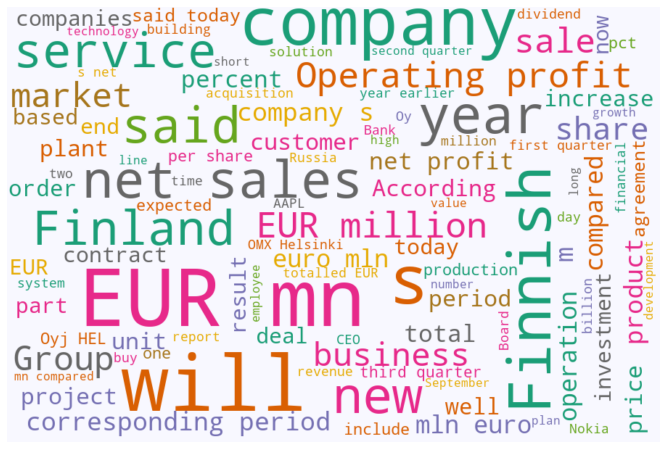

In [26]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=100,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
df["Sentence_length"] = df["Sentence"].str.len()
df["cleaned_Sentence_length"] = df["Sentence_new"].str.len()
d_lengths = df[['Sentence_length', 'cleaned_Sentence_length']]

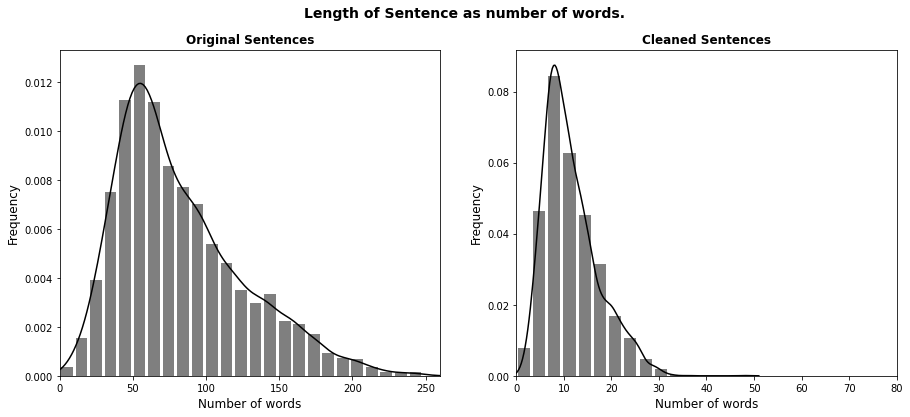

In [28]:
x_1 = d_lengths.Sentence_length
x_2 = d_lengths.cleaned_Sentence_length
plt.figure(figsize=(15,6))
plt.suptitle('Length of Sentence as number of words.', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x_1, color="black", label="No. Words", bins=25, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Sentences",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,260])



# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="black", label="No. Words", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Sentences",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,80])

plt.show()

**Top 25 Most frequent Words**


In [29]:
word_freq = pd.Series(np.concatenate([x.split() for x in df['Sentence_new'].apply(str)])).value_counts()

In [30]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = lismt(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

In [32]:
word_df = word_df.drop(labels=[12,23],axis=0,inplace=False)


Unique words: 13472


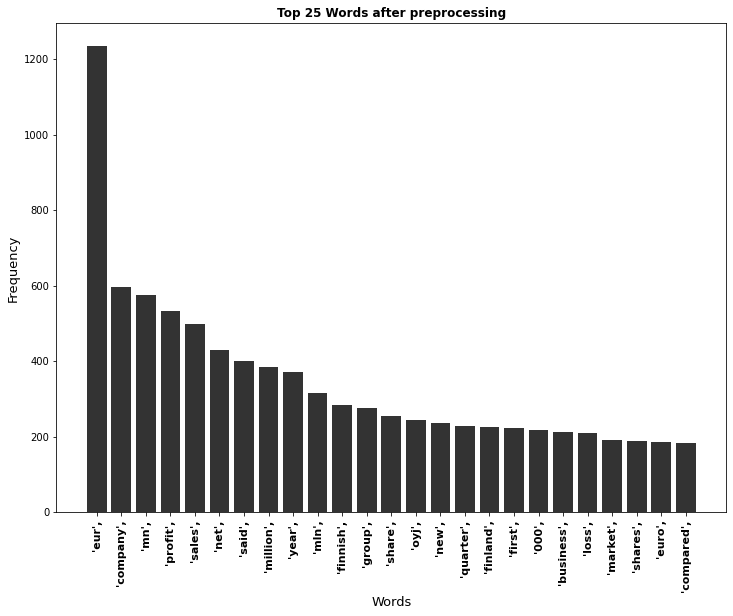

In [33]:
label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

In [34]:
df

,Sentence,Sentiment,mentions,tags,Sentence_clean,Sentence_tokens,Sentence_tokens_lem,Sentence_new,Sentence_length,cleaned_Sentence_length
0,geosolutions technology leverage benefon gps s...,positive,[],[],The GeoSolutions technology will leverage Bene...,"[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",185,21
1,esi lows bk real possibility,negative,[],[],"$ESI on lows, down $1.50 to $2.50 BK a real po...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]","[esi, lows, bk, real, possibility]",28,5
2,last quarter componenta net sales doubled eur1...,positive,[],[],"For the last quarter of 2010 , Componenta 's n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled...","[last, quarter, componenta, net, sales, double...",121,20
3,according finnish russian chamber commerce maj...,neutral,[],[],According to the Finnish-Russian Chamber of Co...,"[according, finnish, russian, chamber, commerc...","[according, finnish, russian, chamber, commerc...","[according, finnish, russian, chamber, commerc...",96,11
4,swedish buyout firm sold remaining percent sta...,neutral,[],[],The Swedish buyout firm has sold its remaining...,"[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...",101,14
...,...,...,...,...,...,...,...,...,...,...
5837,rising costs forced packaging producer huhtama...,negative,[],[],RISING costs have forced packaging producer Hu...,"[rising, costs, forced, packaging, producer, h...","[rising, cost, forced, packaging, producer, hu...","[rising, costs, forced, packaging, producer, h...",87,11
5838,nordic walking first used summer training meth...,neutral,[],[],Nordic Walking was first used as a summer trai...,"[nordic, walking, first, used, summer, trainin...","[nordic, walking, first, used, summer, trainin...","[nordic, walking, first, used, summer, trainin...",69,10
5839,according shipping company viking line eu deci...,neutral,[],[],"According shipping company Viking Line , the E...","[according, shipping, company, viking, line, e...","[according, shipping, company, viking, line, e...","[according, shipping, company, viking, line, e...",79,10
5840,building home improvement trade sales decrease...,neutral,[],[],"In the building and home improvement trade , s...","[building, home, improvement, trade, sales, de...","[building, home, improvement, trade, sale, dec...","[building, home, improvement, trade, sales, de...",54,8


In [35]:
df['Sentenece_Preprocessed'] = df['Sentence_new'].str.join(' ')

In [36]:
df = df.drop(labels=['Sentence', 'mentions','tags','Sentence_clean','Sentence_tokens','Sentence_tokens_lem','Sentence_new','Sentence_length','cleaned_Sentence_length'], axis=1)

In [37]:
df.rename(columns = {'Sentenece_Preprocessed' : 'Sentenece'}, inplace = True)

In [38]:
df.head()

,Sentiment,Sentenece
0,positive,geosolutions technology leverage benefon gps s...
1,negative,esi lows bk real possibility
2,positive,last quarter componenta net sales doubled eur1...
3,neutral,according finnish russian chamber commerce maj...
4,neutral,swedish buyout firm sold remaining percent sta...


**Save Dataframe**

Lastly we save the pre-processed dataframe as a pickle, which is then used for Sentiment Analysis phase. That concludes the pre-processing phase of the analysis.


In [39]:
df.to_pickle('pre-processed_finance_news.pkl')